# MATH 406 Assignment 1

**Name:** James Wu\
**Student number:** 92277235

In [1]:
### IMPORTS ###
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import approximate_taylor_polynomial as taylor

## Q1

### Q1(a)

With 2 points, we use linear interpolation. Solving for $a$ and $b$ in the interpolating function $L(x) = ax + b$ using $L(0) = 0$ and $L(1) = 1$ gives us
$$L(x) = x$$
on $[0,1]$. Then $f(1/2) \approx L(1/2)$, so
$$\boxed{f(1/2) \approx 1/2}$$

In [2]:
# Given data
x = np.array([0, 1])
y = np.array([0, 1])

# Polynomial coeffs
c = np.linalg.solve(np.vander(x), y)
print(f'Polynomial coeffs: {c}')

# Evaluate f(1/2)
ans = np.polyval(c, 1/2)
print(f'f(1/2): {ans}')

Polynomial coeffs: [1. 0.]
f(1/2): 0.5


### Q1(b)

With 3 points, we use quadratic interpolation. Solving for $a$, $b$, and $c$ in the interpolating function $Q(x) = ax^2 + bx + c$ using $Q(0) = 0$, $Q(1) = 1$, and $Q(-1) = 1/2$ gives us
$$Q(x) = \frac{3}{4}x^2 + \frac{1}{4}x$$
on $[-1,1]$. Then $f(1/2) \approx Q(1/2)$, so
$$\boxed{f(1/2) \approx 5/16}$$

In [3]:
# Given data
x = np.array([0, 1, -1])
y = np.array([0, 1, 1/2])

# Polynomial coeffs
c = np.linalg.solve(np.vander(x), y)
print(f'Polynomial coeffs: {c}')

# Evaluate f(1/2)
ans = np.polyval(c, 1/2)
print(f'f(1/2): {ans}')

Polynomial coeffs: [0.75 0.25 0.  ]
f(1/2): 0.3125


### Q1(c)

With 4 points, we use cubic interpolation. Solving for $a$, $b$, $c$, and $d$ in the interpolating function $C(x) = ax^3 + bx^2 + cx + d$ using $C(0) = 0$, $C(1) = 1$, $C(-1) = 1/2$, and $C(2) = 2$ gives us
$$C(x) = -\frac{1}{4}x^3 + \frac{3}{4}x^2 + \frac{1}{2}x$$
$$C'(x) = -\frac{3}{4}x^2 + \frac{3}{2}x + \frac{1}{2}$$
on $[-1,2]$. Then $f'(0) \approx C'(0)$, so
$$\boxed{f'(0) \approx 1/2}$$

In [4]:
# Given data
x = np.array([0, 1, -1, 2])
y = np.array([0, 1, 1/2, 2])

# Polynomial coeffs
c = np.linalg.solve(np.vander(x), y)
print(f'Polynomial coeffs: {c}')

# Differentiate polynomial
dc = np.polyder(c)
print(f'Differentiated coeffs: {dc}')

# Evaluate f'(0)
ans = np.polyval(dc, 0)
print(f"f'(0): {ans}")

Polynomial coeffs: [-0.25  0.75  0.5   0.  ]
Differentiated coeffs: [-0.75  1.5   0.5 ]
f'(0): 0.5


### Q1(d)

With 3 points, we use quadratic interpolation. Solving for $a$, $b$, and $c$ in the interpolating function $Q(x) = ax^2 + bx + c$ using $Q(0) = 1/2$, $Q(1) = 1$, and $Q(-1) = -1$ gives us
$$Q(x) = -\frac{1}{2}x^2 + x + \frac{1}{2}$$
on $[-1,1]$. Using the quadratic equation for $Q(x) = 0$ gets us the roots
$$x = \frac{-1 \pm \sqrt{1 + 1}}{-1} = 1 \pm \sqrt{2}$$
Although $1 - \sqrt{2} \in [-1,1]$, we have $1 + \sqrt{2} \notin [-1,1]$. Since our interpolation is only valid on $[-1,1]$, we approximate a root as
$$\boxed{x \approx 1 - \sqrt{2} \approx -0.414}$$

In [5]:
# Given data
x = np.array([0, 1, -1])
y = np.array([1/2, 1, -1])

# Polynomial coeffs
c = np.linalg.solve(np.vander(x), y)
print(f'Polynomial coeffs: {c}')

# Roots of quadratic
ans = np.roots(c)
print(f'Roots: {ans}')

Polynomial coeffs: [-0.5  1.   0.5]
Roots: [ 2.41421356 -0.41421356]


## Q2

First we numerically check the relative truncation error to get an *ansatz* of the number of terms we should have:

Max rel error for deg = 1: 0.07840485667761549
Max rel error for deg = 2: 0.07822539239066759
Max rel error for deg = 3: 0.011461804276752608
Max rel error for deg = 4: 0.011434873241395872
Max rel error for deg = 5: 0.0020473765267338697


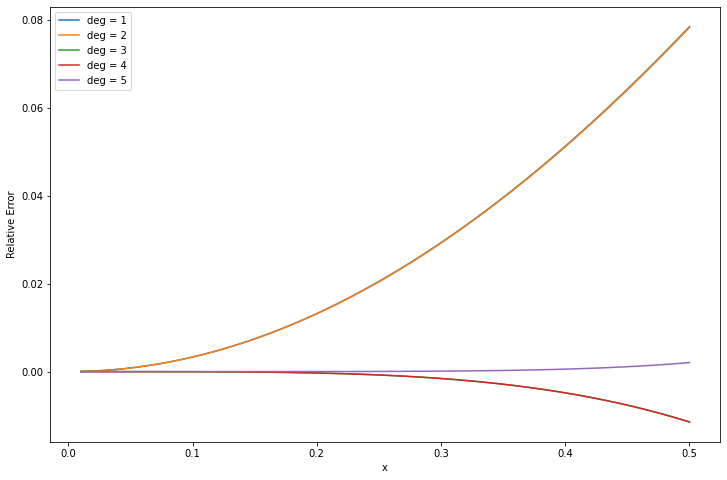

In [6]:
fig, ax = plt.subplots(figsize=(12,8))

x = np.linspace(0.01, 1/2, 1000)
y = np.arctan(x)

for deg in range(1, 6):
    err = (taylor(np.arctan, 0, deg, 0.001)(x) - y)/y
    ax.plot(x, err, label=f'deg = {deg}')
    print(f'Max rel error for deg = {deg}: {np.max(np.abs(err))}')

ax.set_xlabel('x')
ax.set_ylabel('Relative Error')
ax.legend()
plt.show()

So we should expect to go up to fifth order to have a relative error less than 1%; we will now prove this to be the case. Recall that the Taylor series for $\arctan(x)$ about $x = 0$ exists and converges on $[-1,1] \supset [0,1/2]$ as
$$\arctan(x) = \sum_{n=0}^\infty (-1)^n \frac{x^{2n+1}}{2n+1}$$
The presence of only odd powers is indeed supported by the above numerical results (based on how the error only changes every two degrees). We differentiate
$$\arctan'(x) = \frac{1}{1 + x^2}$$
So on $[0,1/2]$, we have $4/5 \leq \arctan'(x) \leq 1$. By MVT we have (note that $\arctan(x) \geq 0$ in this interval)
$$\frac{4}{5}x \leq \big|\arctan(x)\big| \leq x$$
Now let $E_N(x)$ be the error of the Taylor polynomial of degree $N$ evaluated at $x$ i.e.
$$E_N(x) = \sum_{n = \lceil N/2 \rceil}^\infty (-1)^n \frac{x^{2n+1}}{2n+1}$$
Now notice that successive terms decrease in magnitude on $x \in [0,1/2]$:
$$0 < \frac{2n+1}{2n+3} x^2 < 1 \; \therefore \; \frac{x^{2n+3}}{2n+3} = \frac{2n+1}{2n+3} x^2 \frac{x^{2n+1}}{2n+1} < \frac{x^{2n+1}}{2n+1}$$
Since the series alternates and is decreasing in magnitude versus $n$ for $x \geq 0$, we can bound
$$\frac{x^{2\lceil N/2 \rceil + 1}}{2\lceil N/2 \rceil + 1} - \frac{x^{2\lceil N/2 \rceil + 3}}{2\lceil N/2 \rceil + 3} \leq \big|E_N(x)\big| \leq \frac{x^{2\lceil N/2 \rceil + 1}}{2\lceil N/2 \rceil + 1}$$
Then the relative error $r_N(x) = \frac{\big|E_N(x)\big|}{\big|\arctan(x)\big|}$ is bounded as
$$\frac{x^{2\lceil N/2 \rceil}}{2\lceil N/2 \rceil + 1} - \frac{x^{2\lceil N/2 \rceil + 2}}{2\lceil N/2 \rceil + 3} \leq r_N(x) \leq \frac{5}{4}\frac{x^{2\lceil N/2 \rceil}}{2\lceil N/2 \rceil + 1}$$

For $N = 4$, at $x = 1/2$ we have
$$r_4(1/2) \geq \frac{(1/2)^4}{5} - \frac{(1/2)^6}{7} = \frac{23}{2240} > \frac{23}{2300} = 1\%$$
So the relative error is *not* bounded by 1% on $[0,1/2$] for $N = 4$. Now we check $N = 5$:
$$r_5(x) \leq \frac{5}{4} \frac{x^6}{7} \leq \frac{5}{4} \frac{(1/2)^6}{7} = \frac{5}{1792} < \frac{5}{500} = 1\%$$
The first inequality follows from how $x \leq 1/2$. Thus the $N = 5$ polynomial does have a relative error less than 1% on $[0,1/2]$.

So we must use the Taylor polynomial
$$\boxed{T_5(x) = x - \frac{x^3}{3} + \frac{x^5}{5}}$$
to obtain a relative error less than 1%. Though we may quibble over whether this counts as three terms or six (i.e. whether we should count the even powers of $x$, which have coefficients of zero), the Taylor polynomial required is unambiguous.

## Q3

Using shape functions, we have
$$F(x) = \sum_{i=1}^4 f(x_i) \frac{\prod_{j \neq i} (x - x_j)}{\prod_{j \neq i} (x_i - x_j)}$$
We assume $f(x)$ is analytic on the reference interval $[0,1]$ (which is true if $f$ is analytic in any neighbourhood of $x$ in the original interval since $h$ can be made to be arbitrarily small). Taylor expanding $f(x_i)$ about $x$ gets us
$$F(x) = T_0(x) + T_1(x) + T_2(x) + T_3(x) + T_4(x) + O(h^5)$$
where
$$T_0(x) = \sum_{i=1}^4 f(x) \frac{\prod_{j \neq i} (x - x_j)}{\prod_{j \neq i} (x_i - x_j)} = f(x) P_0(x)$$
$$P_0(x) = \sum_{i=1}^4 \frac{\prod_{j \neq i} (x - x_j)}{\prod_{j \neq i} (x_i - x_j)}$$
$$T_1(x) = \sum_{i=1}^4 f'(x) \frac{\prod_{j = 1}^4 (x - x_j)}{\prod_{j \neq i} (x_i - x_j)} = f'(x) P_1(x)$$
$$P_1(x) = \sum_{i=1}^4 \frac{\prod_{j = 1}^4 (x - x_j)}{\prod_{j \neq i} (x_i - x_j)} = \prod_{j = 1}^4 (x - x_j) \sum_{i=1}^4 \frac{1}{\prod_{j \neq i} (x_i - x_j)}$$
$$T_2(x) = \sum_{i=1}^4 \frac{f''(x)}{2} \frac{(x - x_i)\prod_{j = 1}^4 (x - x_j)}{\prod_{j \neq i} (x_i - x_j)} = \frac{f''(x)}{2} P_2(x)$$
$$P_2(x) = \prod_{j = 1}^4 (x - x_j) \sum_{i=1}^4 \frac{(x - x_i)}{\prod_{j \neq i} (x_i - x_j)}$$
$$T_3(x) = \sum_{i=1}^4 \frac{f^{(3)}(x)}{6} \frac{(x - x_i)^2\prod_{j = 1}^4 (x - x_j)}{\prod_{j \neq i} (x_i - x_j)} = \frac{f^{(3)}(x)}{6} P_3(x)$$
$$P_3(x) = \prod_{j = 1}^4 (x - x_j) \sum_{i=1}^4 \frac{(x - x_i)^2}{\prod_{j \neq i} (x_i - x_j)}$$
$$T_4(x) = \sum_{i=1}^4 \frac{f^{(4)}(x)}{24} \frac{(x - x_i)^3\prod_{j = 1}^4 (x - x_j)}{\prod_{j \neq i} (x_i - x_j)} = \frac{f^{(4)}(x)}{24} P_4(x)$$
$$P_4(x) = \prod_{j = 1}^4 (x - x_j) \sum_{i=1}^4 \frac{(x - x_i)^3}{\prod_{j \neq i} (x_i - x_j)}$$

Notice that for $i = 1, 2, 3, 4$ we have
$$P_0(x_i) = \frac{\prod_{j \neq i} (x - x_j)}{\prod_{j \neq i} (x_i - x_j)} = 1$$
Since $P_0(x)$ is a polynomial of degree at most 3 (each term is a product of three $(x - x_j)$), its derivative is a polynomial of degree at most two. But since $P_0(x)$ has four roots, its derivative has three roots by Rolle's theorem. Its derivative must therefore be the zero function (since nonzero polynomials of degree at most two can have at most two roots). Therefore $P_0(x) = 1$ is a constant function.

Meanwhile, we shall show for $n \geq 2$ that
$$q_1(x) = \sum_{i=1}^n \frac{1}{\prod_{j \neq i} (x_i - x_j)} = 0$$
with $n = 4$ as a special case. This can be seen by performing partial fraction decomposition on the $i=1$ term with $x_1$ as the independent variable (recall that the numerator in the term with $(x_i - x_j)$ as the denominator can be obtained by multiplying the original rational function by $(x_i - x_j)$ and subtituting $x_i = x_j$):
$$\frac{1}{\prod_{j=2}^n (x_1 - x_j)} = \sum_{i=2}^n \frac{1}{(x_1 - x_i) \prod_{j=2, j \neq i}^n (x_i - x_j)} = - \sum_{i=2}^n \frac{1}{\prod_{j \neq i} (x_i - x_j)}$$
This cancels out with all the other terms in the expression. This implies that $P_1(x)$ is zero.
We can similarly do PFD for
$$q_2(x) = \sum_{i=1}^n \frac{(x - x_i)}{\prod_{j \neq i} (x_i - x_j)} = 0$$
and
$$q_3(x) = \sum_{i=1}^n \frac{(x - x_i)^2}{\prod_{j \neq i} (x_i - x_j)} = 0$$
on the first term and cancel out all the other terms, allowing us to conclude $P_2(x)$ and $P_3(x)$ to be zero.

Now for $P_4(x)$ and $n = 4$, we cannot immediately use PFD because the degree of the numerator is the same as the degree of the denominator as a rational function of $x_i$. Instead, we rexpress the first term of $q_4(x)$ as
$$\frac{(x - x_1)^3}{\prod_{j \neq 1} (x_1 - x_j)} = -1 + \frac{(x - x_1)^3 + \prod_{j \neq 1} (x_1 - x_j)}{\prod_{j \neq i} (x_1 - x_j)}$$
The numerator $(x - x_1)^3 + \prod_{j \neq 1} (x_1 - x_j)$ is now at most degree 2 in $x_1$, with the $x_1^3$ term having a coefficient of zero in this expression. Performing PFD gets us
$$\frac{(x - x_1)^3}{\prod_{j \neq 1} (x_1 - x_j)} = -1 - \sum_{i=2}^4 \frac{(x - x_i)^3}{\prod_{j \neq i} (x_i - x_j)}$$
The latter term cancels out with the other terms of $q_4(x)$ so we have $q_4(x) = -1$.

We now arrive at
$$F(x) = f(x) - \frac{f^{(4)}(x)}{24} \prod_{i = 1}^4 (x - x_i) + O(h^5)$$
The error is then
$$e(x) = f(x) - F(x) = \frac{f^{(4)}(x)}{24} \prod_{i = 1}^4 (x - x_i) + O(h^5)$$
To leading order (i.e. $h^4$) the error is bounded by
$$\big| e(x) \big| = \big| f(x) - F(x) \big| \leq \frac{1}{24} \max \bigg| f^{(4)}(x) \prod_{i = 1}^4 (x - x_i) \bigg| = \frac{1}{24} \max \bigg| \prod_{i = 1}^4 (x - x_i) \bigg| K_4 h^4$$

We now seek to minimize $\max \bigg| \prod_{i = 1}^4 (x - x_i) \bigg|$ by varying $x_i$; for convenience we define $p(x) = \prod_{i = 1}^4 (x - x_i)$. We utilize the hint by assuming symmetry and we seek to balance the extrema of $p(x)$. Note that $p(x)$ has 3 extrema as it is a fourth degree polynomial: $x = y_0, y_1, y_2$. By Rolle's theorem, these are located as $x_1 < y_0 < x_2$, $x_2 < y_1 < x_3$, and $x_3 < y_2 < x_4$. By symmetry about $x = 1/2$, $p(0) = p(1)$, $p(y_0) = p(y_2)$, and $y_1 = 1/2$. Also, $x_4 = 1 - x_1$ and $x_3 = 1 - x_2$. We therefore need only equate $p(0) = p(y_0) = p(1/2)$.

We compute
$$p(x) = (x - x_1)(x - x_2)(x - (1 - x_1))(x - (1 - x_2))$$
$$p(0) = x_1x_2(1-x_1)(1-x_2)$$
$$p(1/2) = (1/2 - x_1)^2 (1/2 - x_2)^2$$

Using WolframAlpha, we find
$$y_0 = \frac{1}{2} - \frac{1}{2}\sqrt{1 - 2x_1 + 2x_1^2 - 2x_2 + 2x_2^2}$$
$$p(y_0) = -\frac{1}{4}(x_2 - x_1)^2(x_1 + x_2 - 1)^2$$

First equating $\big|p(y_0)\big| = \big|p(1/2)\big|$ gets us
$$(1/2 - x_1)^2 (1/2 - x_2)^2 = \frac{1}{4}(x_2 - x_1)^2(1 - x_1 - x_2)^2$$
$$(1 - 2x_1)(1 - 2x_2) = 2(x_2 - x_1)(1 - x_1 - x_2)$$
$$x_2^2 - 2(1 - x_1)x_2 + 1/2 - x_1^2 = 0$$
$$x_2 = (1 - x_1) \pm \sqrt{(1 - x_1)^2 - (1/2 - x_1^2)} = (1 - x_1) \pm \sqrt{2}(1/2 - x_1)$$

Now equating $\big|p(1/2)\big| = \big|p(0)\big|$ gets us
$$(1/2 - x_1)^4 (1 \pm \sqrt{2})^2 = x_1(1-x_1)\left[x_1(1-x_1) \mp \sqrt{2}(1 - 2x_1)(1/2 - x_1) - 2(1/2 - x_1)^2\right]$$
Let us define
$$y = (1/2 - x_1)^2 (1 \pm \sqrt{2}), \quad z = x_1(1 - x_1) \geq 0$$
Note that the sign of $y$ is the sign of $\pm$ since $\sqrt{2} > 1$. Now our equation becomes
$$y^2 = z(z - 2y)$$
$$y^2 + 2zy + z^2 = 0$$
$$y = -z \pm' \sqrt{2z^2} = -z(1 \mp' \sqrt{2})$$
Since $z \geq 0$, the sign of $y$ is the sign of $\pm'$ (i.e. oppositely signed to $\mp'$). It follows that $\pm = \pm'$, so $y = -z(1 \mp \sqrt{2})$. Thus
$$(1/2-x_1)^2 (1 \pm \sqrt{2}) = -x_1(1-x_1)(1 \mp \sqrt{2})$$
$$(1/2-x_1)^2 = -x_1(1-x_1) \frac{1 \mp \sqrt{2}}{1 \pm \sqrt{2}}$$
$$(1/2-x_1)^2 = x_1(1-x_1)\frac{\sqrt{2} \mp 1}{\sqrt{2} \pm 1} = x_1(1-x_1)(3 \mp 2\sqrt{2})$$
$$(4 \mp 2\sqrt{2})x_1^2 - (4 \mp 2\sqrt{2})x_1 + 1/4 = 0$$
We now re-introduce a second set of signs $\pm'$:
$$x_1 = \frac{(4 \mp 2\sqrt{2}) \pm' \sqrt{20 \mp 14\sqrt{2}}}{2(4 \mp 2\sqrt{2})}$$
To constrain $0 \leq x_1 \leq 1/2$, we are left with only two permutations of $(\pm, \pm')$:
$$x_1 = \frac{(4 - 2\sqrt{2}) - \sqrt{20 - 14\sqrt{2}}}{2(4 - 2\sqrt{2})}, \; \frac{(4 + 2\sqrt{2}) - \sqrt{20 + 14\sqrt{2}}}{2(4 + 2\sqrt{2})}$$
The corresponding values of $x_2$ satisfying $x_1 \leq x_2 \leq 1/2$ are
$$x_2 = (1 - x_1) - \sqrt{2}(1/2 - x_1)$$
for the two values of $x_1$. Trying these two values yields
$$x_1 = \frac{(4 + 2\sqrt{2}) - \sqrt{20 + 14\sqrt{2}}}{2(4 + 2\sqrt{2})}$$
as resulting in a smaller $\big|p(x)\big|$. Rearranging $x_1$ slightly for aesthetic purposes, and plugging in $x_2 = (1 - x_1) - \sqrt{2}(1/2 - x_1)$, $x_3 = 1 - x_2$, and $x_4 = 1 - x_3$, gives us the interpolating points of
$$\boxed{x_1 = \frac{(4 + 2\sqrt{2}) - \sqrt{20 + 14\sqrt{2}}}{2(4 + 2\sqrt{2})}, \quad x_2 = \frac{(4 + 2\sqrt{2}) - (\sqrt{2} - 1)\sqrt{20 + 14\sqrt{2}}}{2(4 + 2\sqrt{2})}}$$
$$\boxed{\quad x_3 = \frac{(4 + 2\sqrt{2}) + (\sqrt{2} - 1)\sqrt{20 + 14\sqrt{2}}}{2(4 + 2\sqrt{2})}, \quad x_4 = \frac{(4 + 2\sqrt{2}) + \sqrt{20 + 14\sqrt{2}}}{2(4 + 2\sqrt{2})}}$$
Numerically, these are
$$\boxed{x_1 = 0.03806, \quad x_2 = 0.30866, \quad x_3 = 0.69134, \quad x_4 = 0.96194}$$

The extremal value $p(0)$ is
$$p(0) = x_1x_2x_3x_4 = \frac{\left((24 + 16\sqrt{2}) - (20 + 14\sqrt{2})\right)\left((24 + 16\sqrt{2}) - (3 - 2\sqrt{2})(20 + 14\sqrt{2})\right)}{16(4 + 2\sqrt{2})^4}$$
$$p(0) = \frac{\left(4 + 2\sqrt{2}\right)\left((24 + 16\sqrt{2}) - (4  + 2\sqrt{2})\right)}{16(4 + 2\sqrt{2})^4} = \frac{20 + 14\sqrt{2}}{16(4 + 2\sqrt{2})^3} = \frac{\left(20+14\sqrt{2}\right)}{16\left(160+112\sqrt{2}\right)}$$
$$p(0) = \frac{1}{128}$$
And so
$$\max\big|e(x)\big| \leq \frac{1}{24 \cdot 128} K_4 h^4 = \frac{1}{3072}K_4h^4$$
$$\boxed{C = \frac{1}{3072} \approx 3.255 \times 10^{-4}}$$

We now verify this error constant numerically with the function $f(x) = x^4/24$. Here we have $K_4 = 1$; since the fourth derivative is constant, the error should approach the error bound when $h$ is small enough.

In [7]:
## Interpolation function
## f  = original function
## x  = points to evaluate interpolating polynomial at
## xi = interpolating points
def interp(f, x, xi):
    
    acc = np.zeros(x.shape)
    
    for i in range(len(xi)):
        
        # Get indices of interpolating points except for xi
        idx = list(range(len(xi)))
        idx.remove(i)
        
        prod = f(xi[i])
        
        for j in idx:
            prod *= (x - xi[j]) / (xi[i] - xi[j])
        
        acc += prod
        
    return acc

In [8]:
## Parameters ##

h = 1e-3
xi = np.array([0.03806, 0.30866, 0.69134, 0.96194]) * h
N = 1000 # number of points to sample at

In [9]:
## Calculations ##

f = lambda x: np.power(x, 4) / 24
x = np.linspace(0, h, N)

print(f'Maximum interpolation error / h^4: {np.max(abs(f(x) - interp(f, x, xi))) / h ** 4:.3e}')

Maximum interpolation error / h^4: 3.255e-04


## Q4

Since $x_1 = 0$ and $x_4 = 1$, we only have one free parameter for the interpolation points if we use symmetry. Then at least two of $|p(0)|, |p(y_0)|, |p(1/2)|$ are equal. To see why, suppose all three are distinct. Then we may vary $x_2$ (with $x_3 = 1 - x_2$) to decrease the largest of the three quantities until it becomes equal to the second largest of the three--at that point, decreasing it further would increase the other quantity to become the largest. But since $p(0) = x_1x_2x_3x_4 = 0$, this just becomes $|p(y_0)| = |p(1/2)|$ i.e.
$$\frac{1}{4} x_2^2 (1 - x_2)^2 = \frac{1}{4} (1/2 - x_2)^2$$
$$x_2(1 - x_2) = 1/2 - x_2$$
$$x_2^2 - 2x_2 + 1/2 = 0$$
$$x_2 = 1 \pm \sqrt{1/2}$$
Since $0 < x_2 < 1/2$, we take $x_2 = 1 - \frac{1}{\sqrt{2}}$. Thus
$$\boxed{x_1 = 0, \quad x_2 = 1 - \frac{1}{\sqrt{2}}, \quad x_3 = \frac{1}{\sqrt{2}}, \quad x_4 = 1}$$
Or numerically,
$$\boxed{x_1 = 0, \quad x_2 = 0.29289, \quad x_3 = 0.70711, \quad x_4 = 1}$$
Then
$$\max \big|p(x)\big| = \big|p(1/2)\big| = \frac{1}{4} (1/2 - x_2)^2 = \frac{3 - 2\sqrt{2}}{16}$$
So $C = \frac{1}{24}\max \big|p(x)\big|$ i.e.
$$\boxed{C = \frac{3 - 2\sqrt{2}}{384} \approx 4.468 \times 10^{-4}}$$

We again verify this error constant numerically with the function $f(x) = x^4/24$.

In [10]:
## Parameters ##

h = 1e-3
xi = np.array([0, 0.29289, 0.70711, 1]) * h
N = 1000 # number of points to sample at

In [11]:
## Calculations ##

f = lambda x: np.power(x, 4) / 24
x = np.linspace(0, h, N)

print(f'Maximum interpolation error / h^4: {np.max(abs(f(x) - interp(f, x, xi))) / h ** 4:.3e}')

Maximum interpolation error / h^4: 4.468e-04


## Q5

To make a fair comparison, we use the same number of points $M$ for each method. 

**Q3 Method:** \
We require $4N$ data points, so $N = M/4$. Then $h = 4/M$, so
$$\max\big|e(x)\big| \leq \left(3.255 \times 10^{-4}\right)\frac{4^4}{M^4} = 0.083328 M^{-4}$$

**Q4 Method:** \
We require $2N$ interior data points and $N + 1$ boundary data points, for a total of $3N + 1$ points. so $N = (M - 1)/3 \approx M/3$ ($M$ is assumed to be large). Then $h = 3/M$, so
$$\max\big|e(x)\big| \leq \left(4.468 \times 10^{-4}\right)\frac{3^4}{M^4} = 0.036191 M^{-4}$$

**Conclusion:** *the Q4 method is more data efficient*, seeing that $0.036191 M^{-4} < 0.083328 M^{-4}$.

## Q6

**B(x) maximum error:** \
We numerically determine the maximum error to be
$$\boxed{\max_{x > 0} \big|\arctan(x) - B(x)\big| = 0.07111}$$

**P(x):** \
If we wish to constrain $P(0) = \arctan(0) = 0$ and $P'(0) = \arctan'(0) = 1$, we must set $C_0 = 0$ and $C_1 = 1$. Meanwhile, if we wish to retain the $x \to \infty$ asymptotic value, we see that
$$\lim_{x \to \infty} P(x) = \frac{C_2}{A_2} = \lim_{x \to \infty} \arctan(x) = \frac{\pi}{2}$$
So $C_2 = \frac{\pi}{2} A_2$. Finally, we can determine $A_2$ and $A_1$ by trial and error. Through this process, we get
$$\boxed{C_0 = 0, \quad C_1 = 1, \quad C_2 = \frac{\pi}{4}, \quad A_1 = \frac{\pi}{4}, \quad A_2 = \frac{1}{2}}$$
$$\boxed{P(x) = \frac{x + \frac{\pi}{4}x^2}{1 + \frac{\pi}{4}x + \frac{1}{2}x^2}}$$
Also, we ensure that $P(x)$ has no real poles for $x > 0$. This is true because the discriminant of the denominator is negative:
$$\Delta = \frac{\pi^2}{16} - 1 \approx -0.383 < 0$$
Finally, the maximum computed error for the obtained $P(x)$ is
$$\boxed{\max_{x > 0} \big|\arctan(x) - P(x)\big| = 0.04023}$$

In [12]:
xlim = 200
npts = 100000

In [13]:
def B(x):
    return np.pi/2 * x/(1+x)

In [14]:
def P(x):
    
    c0 = 0
    c1 = 1
    a2 = 1/2
    c2 = np.pi/4
    a1 = np.pi/4
    
    return (c0 + c1 * x + c2 * x * x) / (1 + a1 * x + a2 * x * x)

B(x) max error: 0.07111463690417996
P(x) max error: 0.040234630458985565


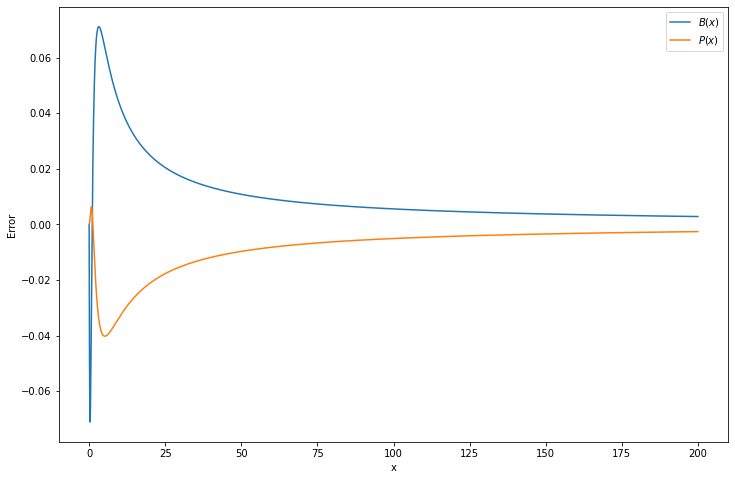

In [15]:
fig, ax = plt.subplots(figsize=(12,8))

x = np.linspace(0, xlim, npts)
e1 = np.arctan(x) - B(x)
e2 = np.arctan(x) - P(x)

ax.plot(x, e1, label='$B(x)$')
print(f'B(x) max error: {np.max(np.abs(e1))}')
ax.plot(x, e2, label='$P(x)$')
print(f'P(x) max error: {np.max(np.abs(e2))}')

ax.set_xlabel('x')
ax.set_ylabel('Error')
ax.legend()
plt.show()

**Justification of `xlim`:** \
We know that $\arctan(x)$ is an increasing function since $\arctan'(x) = 1/(1 + x^2) > 0$. Furthermore, $B(x)$ is also increasing, because $B(x) = \frac{\pi}{2} \left(1 - \frac{1}{1 + x}\right)$, and $\frac{1}{1 + x}$ decreases with increasing $x$ for $x > 0$.\
Finally, we show that $P(x)$ is increasing. That is, for $0 < x_1 < x_2$ we have $P(x_1) < P(x_2)$:
$$x_1 < x_2 \; \therefore \; x_1 + \frac{\pi}{4}x_1^2 < x_2 + \frac{\pi}{4}x_2^2 \; \therefore \; x_1 + \frac{\pi}{4}x_1^2 + \frac{\pi}{4}x_1x_2 + \frac{\pi}{8}x_1^2x_2^2 < x_2 + \frac{\pi}{4}x_2^2 + \frac{\pi}{4}x_1x_2 + \frac{\pi}{8}x_1^2x_2^2$$
Since $\pi^2/16 - 1/2 > 0$:
$$\left(\frac{\pi^2}{16} - \frac{1}{2}\right)x_1 < \left(\frac{\pi^2}{16} - \frac{1}{2}\right)x_2 \; \therefore \; \left(\frac{\pi^2}{16} - \frac{1}{2}\right)x_1^2x_2 < \left(\frac{\pi^2}{16} - \frac{1}{2}\right)x_1x_2^2$$
Thus
$$x_1 + \frac{\pi}{4}x_1^2 + \frac{\pi}{4}x_1x_2 + \frac{\pi}{8}x_1^2x_2^2 + \left(\frac{\pi^2}{16} - \frac{1}{2}\right)x_1^2x_2 < x_2 + \frac{\pi}{4}x_2^2 + \frac{\pi}{4}x_1x_2 + \frac{\pi}{8}x_1^2x_2^2 + \left(\frac{\pi^2}{16} - \frac{1}{2}\right)x_1x_2^2$$
$$x_1 + \frac{\pi}{4}x_1^2 + \frac{\pi}{4}x_1x_2 + \frac{\pi}{8}x_1^2x_2^2 + \frac{\pi^2}{16}x_1^2x_2 + \frac{1}{2}x_1x_2^2 < x_2 + \frac{\pi}{4}x_2^2 + \frac{\pi}{4}x_1x_2 + \frac{\pi}{8}x_1^2x_2^2 + \frac{\pi^2}{16}x_1x_2^2 + \frac{1}{2}x_1^2x_2$$
We factor both sides of the inequality:
$$\left(x_1 + \frac{\pi}{4}x_1^2\right)\left(1 + \frac{\pi}{4}x_2 + \frac{1}{2}x_2^2\right) < \left(x_2 + \frac{\pi}{4}x_2^2\right)\left(1 + \frac{\pi}{4}x_1 + \frac{1}{2}x_1^2\right)$$
Note that the factors $\left(x_i + \frac{\pi}{4}x_i^2\right)$ and $\left(1 + \frac{\pi}{4}x_i + \frac{1}{2}x_i^2\right)$ are positive for $x_i > 0$. Thus
$$P(x_1) = \frac{x_1 + \frac{\pi}{4}x_1^2}{1 + \frac{\pi}{4}x_1 + \frac{1}{2}x_1^2} < P(x_2) = \frac{x_2 + \frac{\pi}{4}x_2^2}{1 + \frac{\pi}{4}x_2 + \frac{1}{2}x_2^2}$$

Also, $\arctan(x)$, $B(x)$, and $P(x)$ are bounded above by $\pi/2$. This is because they all are increasing and approach $\pi/2$ as $x \to \infty$.

Now in the numerical calculations, the error was only computed for $x \in [0, x_{lim}]$. Then let $e_0$ be the maximum error computed for $x \in [0, x_{lim}]$, $e_1$ be the maximum error for $x \in (x_{lim}, \infty)$, and $e$ be the true maximum error i.e. for $x \in [0, \infty)$. Hence $e = \max(e_0, e_1)$. Then the cutoff $x_{lim}$ is justified if $e_1 < e_0$ so that $e = e_0$ i.e. the computed maximum error is indeed the maximum error for all $x > 0$.

Let $f(x)$ be any increasing function bounded above by $\pi/2$ (namely, $f(x) = \arctan(x), B(x), P(x)$). If $f(x_{lim}) > \pi/2 - e_0$, then $\pi/2 - e_0 < f(x) < \pi/2$ for all $x \in (x_{lim}, \infty)$. Letting $f(x)$ be $B(x)$ and $\arctan(x)$ and $e_0$ be the computed maximum error for $B(x)$ tells us that
$$\pi/2 - e_0 < \arctan(x), B(x), \pi/2 \; \therefore \; \big|\arctan(x) - B(x)\big| < e_0$$
for $x > x_{lim}$. Similarly, if we use $P(x)$ in place of $B(x)$, we get
$$\big|\arctan(x) - P(x)\big| < e_0$$
for $x > x_{lim}$ with $e_0$ being the computed maximum error for $P(x)$. We verify below that this is the case--thus the computed $e_0$ values for $B(x)$ and $P(x)$ are indeed maximal errors for all $x > 0$.

In [16]:
print(f'pi/2 - arctan({xlim}) = {np.pi/2 - np.arctan(xlim)}')
print(f'pi/2 - B({xlim}) = {np.pi/2 - B(xlim)}')
print(f'pi/2 - P({xlim}) = {np.pi/2 - P(xlim)}')

pi/2 - arctan(200) = 0.0049999583339581655
pi/2 - B(200) = 0.007814907098482093
pi/2 - P(200) = 0.0023966026146511332


## Q7

We can split the integral as
$$\int_0^1 \frac{\exp(x^2)\cos(x)}{x^{2/3}} dx = \int_0^\varepsilon \frac{\exp(x^2)\cos(x)}{x^{2/3}} dx + \int_\varepsilon^1 \frac{\exp(x^2)\cos(x)}{x^{2/3}} dx$$
for $0 < \varepsilon < 1$. To avoid the singularity at $x = 0$, we approximate the first term as
$$\int_0^\varepsilon \frac{\exp(x^2)\cos(x)}{x^{2/3}} dx \approx \int_0^\varepsilon \frac{1}{x^{2/3}} dx = 3\varepsilon^{1/3}$$
Now define $e(x) = \exp(x^2)\cos(x) - 1$. Taking power series expansions of $\exp(x^2)$ and $\cos(x)$ gives us
$$e(x) = \left(1 + x^2 + P(x^4)\right)\left(1 - \frac{x^2}{2} + P(x^4)\right) - 1 = \frac{x^2}{2} + P(x^4)$$
where $P(x^n)$ stands for a sum of integer powers of $x$ of degree $n$ or higher. When $\varepsilon$ is small, $P(x^4)$ becomes negligible compared to $\frac{x^2}{2}$ for $0 < x < \varepsilon$, so we can take only the leading order term. Thus
$$\bigg|\int_0^\varepsilon \frac{\exp(x^2)\cos(x)}{x^{2/3}} dx - \int_0^\varepsilon \frac{1}{x^{2/3}} dx\bigg| \approx \bigg|\int_0^\varepsilon \frac{x^2/2}{x^{2/3}}\bigg| = \frac{3}{14}\varepsilon^{7/3}$$
Since we want the error of the overall integral to be less than $10^{-3}$, we shall constrain the error of this integral to be less than $10^{-4}$. Solving for $\varepsilon$ in $\frac{3}{14}\varepsilon^{7/3} < 10^{-4}$ gives us $\varepsilon < 0.0373$. We shall simply take
$$\varepsilon = 0.035$$

Now the derivative of the integrand $f(x) = \exp(x^2)\cos(x)x^{-2/3}$ is
$$f'(x) = 2x\exp(x^2)\cos(x)x^{-2/3} - \exp(x^2)\sin(x)x^{-2/3} - \frac{2}{3}\exp(x^2)\cos(x)x^{-5/3}$$
$$f'(x) = \exp(x^2)x^{-5/3}\left(2x^2\cos(x) - x\sin(x) - \frac{2}{3}\right)$$
On the interval $(\varepsilon, 1)$ we have $\big|\exp(x^2)\big| \leq e$, $\big|x^{-5/3}\big| \leq \varepsilon^{-5/3}$, and $\big|2x^2\cos(x) - x\sin(x) - \frac{2}{3}\big| < 2 + 1 + \frac{2}{3} = \frac{11}{3}$. And so
$$\big|f'(x)\big| < \frac{11e}{3}\varepsilon^{-5/3} = 2661.5 < 2680$$
Finally, if we use the right Riemann sum on the slice $[x_0, x_0 + h]$, we have an error bound of
$$\big|E_h\big| = \bigg|\int_{x_0}^{x_0 + h}f(x)dx - f(x_0 + h)\bigg| = \bigg|\int_{x_0}^{x_0 + h}\left[f(x) - f(x_0 + h)\right]dx\bigg| = \bigg|\int_{x_0}^{x_0 + h}f'(\xi(x))(x - x_0 - h)dx\bigg|$$
where $x < \xi(x) < x_0 + h$. Continuing,
$$\big|E_h\big| = \bigg|\int_{0}^{h}f'(\xi(x + x_0))(x - h)dx\bigg| \leq \left(\max_{y \in (x_0, x_0 + h)} \big| f'(y) \big| \right)\int_{0}^{h} \big| x - h \big|dx$$
$$\big|E_h\big| \leq \left(\max_{y \in (0, 1)} \big| f'(y) \big| \right)\int_{0}^{h} (h-x) dx < 1340h^2$$
There will be $\frac{1 - 0.035}{h} = \frac{0.965}{h}$ subintervals for the $\int_\varepsilon^1 \frac{\exp(x^2)\cos(x)}{x^{2/3}} dx$ integral. The global error is therefore bounded by
$$\big|\mathcal{E}_h\big| \leq 1340h^2\left(\frac{0.965}{h}\right) = 1293.1h < 1300h$$

To account for the $10^{-4}$ error from before, as well as to add a safety factor, we shall bound $\big|\mathcal{E}_h\big| < 7 \times 10^{-4}$. That gives us $h \leq 5.385 \times 10^{-7}$. Then the number of subintervals $N$ must be at least $\frac{0.965}{5.385 \times 10^{-7}} = 1.792 \times 10^6$. To give a margin, we select $N = 2 \times 10^6$.

In [17]:
eps = 0.035
N = int(2e6)
h = (1 - eps) / N

In [18]:
x = np.linspace(eps, 1, N+1)
y = np.exp(x*x) * np.cos(x) / np.power(x, 2/3)

In [19]:
# Right Riemann sum
I1 = 3 * np.power(eps, 1/3)
I2 = np.sum(y[1:]) * h
print(f'Integral = {I1 + I2}')

Integral = 3.2136306932738297


So the integral evaluates to
$$\boxed{\int_0^1 \frac{\exp(x^2)\cos(x)}{x^{2/3}} dx \approx 3.214}$$
within an error of $10^{-3}$.

Finally, a remark about floating-point precision is in order here. The double-precision float (which NumPy uses by default) has 52 mantissa bits i.e. between 15 and 16 significant figures in base 10. The integral is clearly less than 10, as we can also see from how
$$\bigg|\int_\varepsilon^1 \frac{\exp(x^2)\cos(x)}{x^{2/3}}dx\bigg| \leq e\int_\varepsilon^1 \frac{dx}{x^{2/3}}\bigg| = 3e(1 - \varepsilon^{2/3}) = 7.28 < 10$$
This means that our error bound of $5 \times 10^{-4}$ for each subinterval is roughly 4 orders of magnitude less than the total integral. Since we are adding the integrals of each subinterval together, the floating-point error should be much less than 4 significant figures. And this is indeed the case for 15 to 16 significant digits.

## Q8

### Q8(a)

Let $h$ be the grid spacing. Then
$$F_{i+m} = f(x_i) + f'(x_i)(mh) + f''(x_i)\frac{(mh)^2}{2} + f^{(3)}(x_i)\frac{(mh)^3}{6} + f^{(4)}(x_i)\frac{(mh)^4}{24} + f^{(5)}(x_i)\frac{(mh)^5}{120} + O(h^6)$$
We seek to approximate $f''(x_i) \approx aF_{i-2} + bF_{i-1} + cF_i + dF_{i+1} + eF_{i+2}$ for some constants $a, b, c, d, e$. We now determine the constants by examining the terms for each power of $h$.

$h^1$:\
This term is $(-2a - b + d + 2e)f'(x_i)h$. Hence
$$-2a - b + d + 2e = 0$$

$h^3$:\
This term is $(-8a - b + d + 8e)\frac{f^{(3)}(x_i)}{6}h^3$. Hence
$$-8a - b + d + 8e = 0$$

Subtracting the $h^1$ and $h^3$ equations gets us $6a - 6e = 0$, so $a = e$. We also see that $b = d$, so the grid coefficients are symmetric. In fact, this eliminates all odd power terms, including $h^5$:
$$-32a - b + d + 32e = 0$$

$h^0$:\
This term is just $(a + b + c + d + e)f(x_i) = (2a + 2b + c)f(x_i)$. Hence
$$2a + 2b + c = 0$$

$h^2$:\
We get $(8a + 2b)\frac{f''(x_i)}{2}h^2 = f''(x_i)$. Hence
$$4a + b = \frac{1}{h^2}$$

$h^4$:\
We obtain $(32a + 2b)\frac{f^{(4)}(x_i)}{24}h^4 = 0$. Hence
$$16a + b = 0$$

Subtracting the $h^4$ and $h^2$ equations gives us $12a = -\frac{1}{h^2}$, or $a = -\frac{1}{12h^2}$. That gets us $b = \frac{4}{3h^2}$. Finally, applying the $h^0$ equation gives $c = -\frac{5}{2h^2}$. Thus
$$\boxed{f''(x_i) \approx \frac{-F_{i-2} + 16F_{i-1} - 30F_i + 16F_{i+1} - F_{i+2}}{12h^2}}$$

This approximation is indeed fourth order accurate. To see why, let $D_2 \approx f''(x_i)$ be our approximation of $f''(x_i)$. Then the error is
$$f''(x_i) - D = f''(x_i) - \left(f''(x_i) + \frac{-O(h^6) + 16O(h^6) - 30O(h^6) + 16O(h^6) - O(h^6)}{h^2}\right) = \frac{O(h^6)}{h^2} = O(h^4)$$

### Q8(b)

We proceed as in part (a), except with the $h^2$ term equalling zero and the $h^4$ term becoming $f^{(4)}(x_i)$. The former gives us
$$4a + b = 0$$
while the latter gives us
$$(32a + 2b)\frac{f^{(4)}(x_i)}{24}h^4 = f^{(4)}(x_i) \; \therefore \; 16a + b = \frac{12}{h^4}$$
Subtracting the two equations therefore gives
$$12a = \frac{12}{h^4} \; \therefore \; a = \frac{1}{h^4}$$
Then $b = -4a = -\frac{4}{h^4}$ and $c = -2a - 2b = \frac{6}{h^4}$. Thus
$$\boxed{f^{(4)}(x_i) \approx \frac{F_{i-2} - 4F_{i-1} + 6F_i - 4F_{i+1} + F_{i+2}}{h^4}}$$

Finally, we show that this is second order accurate. Let $D_4$ be our approximation to the fourth derivative. Then the error is
$$f^{(4)}(x_i) - D_4 = f^{(4)}(x_i) - \left(f^{(4)}(x_i) + \frac{O(h^6) - 4O(h^6) + 6O(h^6) - 4O(h^6) + O(h^6)}{h^4}\right) = \frac{O(h^6)}{h^4} = O(h^2)$$

## Q9

In [20]:
## Adaptive trapezoidal rule
##   f    = integrand function
##   a    = lower bound of integration
##   b    = upper bound of integration
##   tol  = error tolerance for integral
##   N    = initial number of subintervals
##   hmin = minimum subinterval length ()
##   sf   = numerical safety factor
##   Returns numerical integral and the computation grid, or None if unable to compute
def adaptivetrapz(f, a, b, tol, N, hmin, sf=0.8):
    
    if (b - a) / N < hmin:
        return None
    
    # Subinterval = [x0, x0+h]

    ## Divide and conquer halving of subinterval
    ##   c  = lower bound of interval
    ##   d  = lower bound of interval
    ##   fc = f(c)
    ##   fd = f(d)
    ##   Returns numerical integral and the computation grid (sans the first point to avoid duplicates), or None if unable to compute
    def dc(c, d, fc, fd):
        
        h = d - c
        
        if h < hmin:
            return None
        
        x_half = (c + d)/2
        f_half = f(x_half)
        
        Th = (fc + fd) * h / 2
        Th2 = (fc + 2 * f_half + fd) * h / 4
        
        if (abs(Th2 - Th) / 3) <= (sf * h * tol / (b - a)):
            return Th2, [d]
        else:
            
            res1 = dc(c, x_half, fc, f_half)
            res2 = dc(x_half, d, f_half, fd)
            
            if res1 is None or res2 is None:
                return None
            
            return res1[0] + res2[0], res1[1] + res2[1]
    
    
    acc = 0
    cgrid = [a]
    
    h0 = (b - a) / N
    f_prev = f(a)
    
    # Iterate through initial subintervals
    for x0 in np.linspace(a, b, N+1)[:-1]:
        
        f_next = f(x0 + h0)
        
        res = dc(x0, x0 + h0, f_prev, f_next)
        
        if res is None:
            return None
        
        acc += res[0]
        cgrid += res[1]
        
        f_prev = f_next
    
    return acc, cgrid

The above implementation proceeds as follows:
1) An initial grid of subintervals is created. The integrals of all these initial subintervals shall be added together to form the total integral (this is done in the `for` loop).
2) Within each initial subinterval, we recursively add the trapezoidal rule for each half subinterval to determine the total integral for that subinterval (this is done with the nested function `dc`).
    1. This recursion terminates when $\big|T_{h/2} - T_h\big|/3 \leq \theta\delta h / (b - a)$.
    
The function is set to terminate when we arrive at a subinterval less than the minimum tolerable size `hmin`. Also, function evaluations between adjacent subintervals are reused (using `f_prev` and `f_half` to store these values) to minimize evaluations of `f`.\
Also, we compute $T_h$ and $T_{h/2}$ on the interval $[c, d]$ (so $d - c = h$) as
$$T_h = \left(\frac{f(c) + f(d)}{2}\right)h$$
$$T_{h/2} = \left(\frac{f(c) + f\left(\frac{c+d}{2}\right)}{2}\right)\left(\frac{h}{2}\right) + \left(\frac{f\left(\frac{c+d}{2}\right) + f(d)}{2}\right)\left(\frac{h}{2}\right) = \left(\frac{f(c) + 2f\left(\frac{c+d}{2}\right) + f(d)}{4}\right)h$$
We now use `adaptivetrapz` to compute
$$\int_0^7 \sin(x^2) dx$$

In [21]:
## Params ##
f    = lambda x: np.sin(x*x)
a    = 0
b    = 7
tol  = 1e-4
N    = 10
hmin = 1e-9
sf   = 0.8

In [22]:
## Evaluation ##
igral, cgrid = adaptivetrapz(f, a, b, tol, N, hmin, sf)
print(f'Computed integral: {igral}')

Computed integral: 0.6058889596548032


Here we evaluated the integral to be $0.60589$. To five significant figures, this agrees with the WolframAlpha result. Hence we can be confident that the answer is indeed within $10^{-4}$ of the actual value.\
We now plot the adaptive computational grid points as a probability density function, since there are too many raw grid points that can be discerend from a direct plot. As we expect, the density of grid points is large where $\big|f''(x)\big|$ is large.

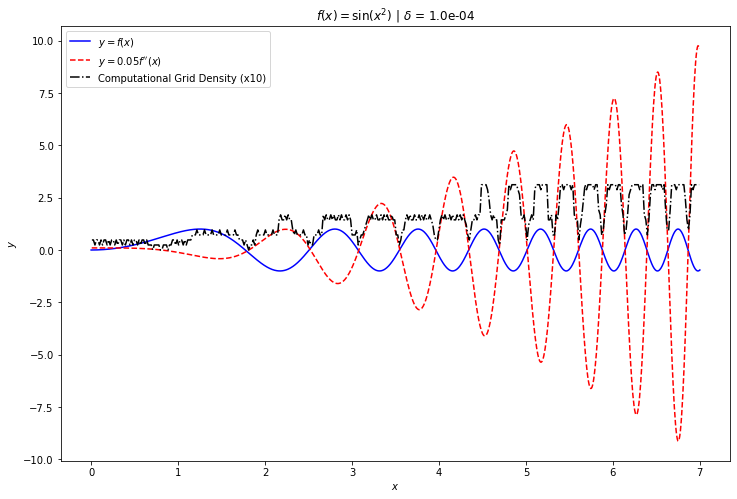

In [23]:
## Plotting ##

fig, ax = plt.subplots(figsize=(12,8))

npts = 1000
dx = (b - a) / npts
x = np.linspace(a, b, npts)
y = f(x)

hist_pts = 400
cgrid_hist = np.histogram(cgrid, bins=hist_pts, range=(a,b), density=True)

ax.plot(x, y, label='$y = f(x)$', c='b')

d2_coeff = 0.05
ax.plot(x[1:-1], d2_coeff * np.diff(np.diff(y)) / (dx * dx), label=f"$y = {d2_coeff} f''(x)$", c='r', ls='--')

cgd_coeff = 10
ax.plot((cgrid_hist[1][1:] + cgrid_hist[1][:-1]) / 2, cgd_coeff * cgrid_hist[0], label=f'Computational Grid Density (x{cgd_coeff})', c='k', ls='-.')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title(f'$f(x) = \\sin(x^2)$ | $\\delta$ = {tol:.1e}')
ax.legend()

plt.show()

For visual appeal we will, however, plot the computation grid points for a smaller and more relaxed version of the integral; we set the boundaries to be $[0, 3]$ and the tolerance to be $2 \times 10^{-3}$. In this case, the grid points are visible to the naked eye (and typical 1080p monitor).

In [24]:
## Computations ##

f    = lambda x: np.sin(x*x)
a    = 0
b    = 3
tol  = 2e-3
N    = 10
hmin = 1e-9
sf   = 0.8

igral, cgrid = adaptivetrapz(f, a, b, tol, N, hmin, sf)

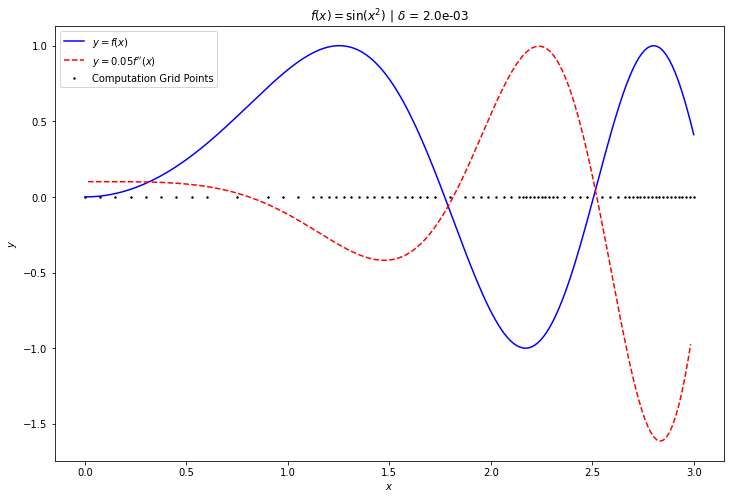

In [25]:
## Plotting ##

fig, ax = plt.subplots(figsize=(12,8))

npts = 200
dx = (b - a) / npts
x = np.linspace(a, b, npts)
y = f(x)

ax.plot(x, y, label='$y = f(x)$', c='b')

d2_coeff = 0.05
ax.plot(x[1:-1], d2_coeff * np.diff(np.diff(y)) / (dx * dx), label=f"$y = {d2_coeff} f''(x)$", c='r', ls='--')

ax.scatter(cgrid, np.zeros(len(cgrid)), label='Computation Grid Points', c='k', s=2)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title(f'$f(x) = \\sin(x^2)$ | $\\delta$ = {tol:.1e}')
ax.legend()

plt.show()

We again see that grid points accumulate where the second derivative is large in absolute value.

Now, beyond testing
$$\int_0^7 \sin(x^2) dx$$
we shall also test the adaptive method on a few elementary integrals with varying error tolerances.

In [26]:
## f(x) = -exp(x)
## F(x) = -exp(x)
f    = lambda x: -np.exp(x)
F    = lambda x: -np.exp(x) # antiderivative
a    = 0
b    = 1
N    = 2
hmin = 1e-9
sf   = 0.8

expected = F(b) - F(a)

In [27]:
tol = 1e-2
igral, _ = adaptivetrapz(f, a, b, tol, N, hmin, sf)
print(f'tol = {tol:.2e} | error = {expected - igral:.3e}')

tol = 1.00e-02 | error = 4.768e-03


In [28]:
tol = 1e-4
igral, _ = adaptivetrapz(f, a, b, tol, N, hmin, sf)
print(f'tol = {tol:.2e} | error = {expected - igral:.3e}')

tol = 1.00e-04 | error = 3.496e-05


In [29]:
tol = 1e-6
igral, _ = adaptivetrapz(f, a, b, tol, N, hmin, sf)
print(f'tol = {tol:.2e} | error = {expected - igral:.3e}')

tol = 1.00e-06 | error = 4.975e-07


In [30]:
## f(x) = 1/x
## F(x) = ln(x)
f    = lambda x: 1/x
F    = lambda x: np.log(x) # antiderivative
a    = 1
b    = 3
N    = 4
hmin = 1e-9
sf   = 0.8

expected = F(b) - F(a)

In [31]:
tol = 1e-2
igral, _ = adaptivetrapz(f, a, b, tol, N, hmin, sf)
print(f'tol = {tol:.2e} | error = {expected - igral:.3e}')

tol = 1.00e-02 | error = -2.452e-03


In [32]:
tol = 1e-4
igral, _ = adaptivetrapz(f, a, b, tol, N, hmin, sf)
print(f'tol = {tol:.2e} | error = {expected - igral:.3e}')

tol = 1.00e-04 | error = -4.635e-05


In [33]:
tol = 1e-6
igral, _ = adaptivetrapz(f, a, b, tol, N, hmin, sf)
print(f'tol = {tol:.2e} | error = {expected - igral:.3e}')

tol = 1.00e-06 | error = -4.094e-07


In [34]:
## f(x) = x^2
## F(x) = x^3/3
f    = lambda x: x*x
F    = lambda x: x*x*x/3 # antiderivative
a    = -3
b    = 1
N    = 6
hmin = 1e-9
sf   = 0.8

expected = F(b) - F(a)

In [35]:
tol = 1e-2
igral, _ = adaptivetrapz(f, a, b, tol, N, hmin, sf)
print(f'tol = {tol:.2e} | error = {expected - igral:.3e}')

tol = 1.00e-02 | error = -4.630e-03


In [36]:
tol = 1e-4
igral, _ = adaptivetrapz(f, a, b, tol, N, hmin, sf)
print(f'tol = {tol:.2e} | error = {expected - igral:.3e}')

tol = 1.00e-04 | error = -7.234e-05


In [37]:
tol = 1e-6
igral, _ = adaptivetrapz(f, a, b, tol, N, hmin, sf)
print(f'tol = {tol:.2e} | error = {expected - igral:.3e}')

tol = 1.00e-06 | error = -2.826e-07


Indeed, we see that these elementary integrals are evaluated within the expected tolerances (floating-point precision is not a worry here, since we have 15 to 16 significant figures for this data type). Furthermore, despite having the same initial subintervals (i.e. same `N`), the errors remain within one order of magnitude below the tolerated error, as the tolerated errors are decreased several orders of magnitude. This confirms that the adaptive method is in fact zooming in to decrease the error within expected bounds, and suggests that the implementation is robust to arbitrarily small tolerances (up to floating-point precision). Also, the successful evaluation of integrals with both positive and negative errors helps to verify the absolute value of error is taken into account, rather than the signed error itself.

Next, we test the safety factor:

In [38]:
## f(x) = 1 / (1 + x^2)
## F(x) = arctan(x)
f    = lambda x: 1 / (1 + x*x)
F    = lambda x: np.arctan(x) # antiderivative
a    = -1
b    = 2
tol  = 1e-3
N    = 5
hmin = 1e-9

expected = F(b) - F(a)

In [39]:
sf = 0.8
igral, _ = adaptivetrapz(f, a, b, tol, N, hmin, sf)
print(f'sf x tol = {sf * tol:.2e} | error = {expected - igral:.3e}')

sf x tol = 8.00e-04 | error = -4.643e-05


In [40]:
sf = 0.2
igral, _ = adaptivetrapz(f, a, b, tol, N, hmin, sf)
print(f'sf x tol = {sf * tol:.2e} | error = {expected - igral:.3e}')

sf x tol = 2.00e-04 | error = -3.404e-05


In [41]:
sf = 0.05
igral, _ = adaptivetrapz(f, a, b, tol, N, hmin, sf)
print(f'sf x tol = {sf * tol:.2e} | error = {expected - igral:.3e}')

sf x tol = 5.00e-05 | error = -6.777e-06


So decreasing the safety factor (in this context, a smaller safety factor corresponds to a *safer* tolerance) does in fact decrease the error. Of course, there is still a margin between the actual error and the error tolerance with the safety factor included. This is expected given how halving subintervals can make the integral of the subinterval go from being above the error threshold to being well within it. In fact, if we note that the error of a subinterval is $O(h^3)$, then a halving would reduce the error by a factor of $2^3 = 8$. We indeed see that the computed errors are within a factor of 8 of the tolerance with safety factor incorporated. Another potential reduction of error is the cancellation of errors when adding results between subintervals.\
Finally, we check that `hmin` triggers a termination when it is breached.

In [42]:
## f(x) = cos(x)
## F(x) = sin(x)
f    = lambda x: np.cos(x)
F    = lambda x: np.sin(x) # antiderivative
a    = -1
b    = 2
tol  = 1e-6
N    = 5
sf   = 0.8

expected = F(b) - F(a)

In [43]:
# This should not trigger an hmin error
hmin = 1e-9
_, cgrid = adaptivetrapz(f, a, b, tol, N, hmin, sf)
hsmall = np.min(np.diff(cgrid))
print(f'Smallest h: {hsmall:.3e}')

Smallest h: 2.344e-03


In [44]:
# This should trigger an hmin error i.e. return None
hmin = 1.2 * hsmall
ans = adaptivetrapz(f, a, b, tol, N, hmin, sf)
print(ans)

None
